<a href="https://colab.research.google.com/github/CodePool-soham/Data-Science/blob/main/PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [ ]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


print(df['loan_status'].value_counts())


loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


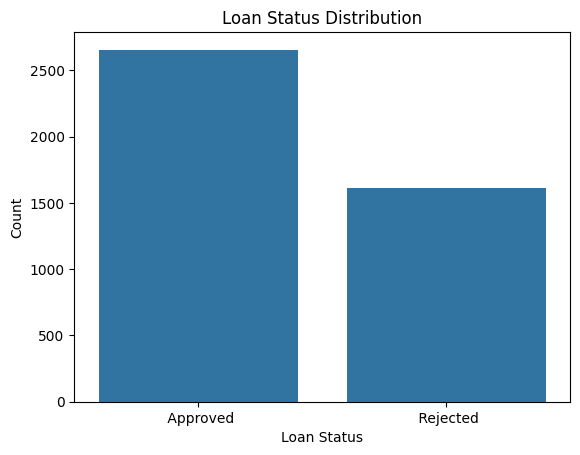

In [ ]:

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


DATA CLEANING AND PREPROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Strip column names
df.columns = df.columns.str.strip()

# Drop loan_id (not useful for prediction)
df = df.drop('loan_id', axis=1)

# Label encode categorical columns
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])        # Graduate/Not Graduate
df['self_employed'] = le.fit_transform(df['self_employed'])  # Yes/No
df['loan_status'] = le.fit_transform(df['loan_status'])    # Approved/Rejected

# Split into features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [ ]:
y.head()

,loan_status
0,0
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class balance
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0: 2125, 1: 1290})
After SMOTE: Counter({1: 2125, 0: 2125})


EXPLORATORY DATA  ANALYSIS

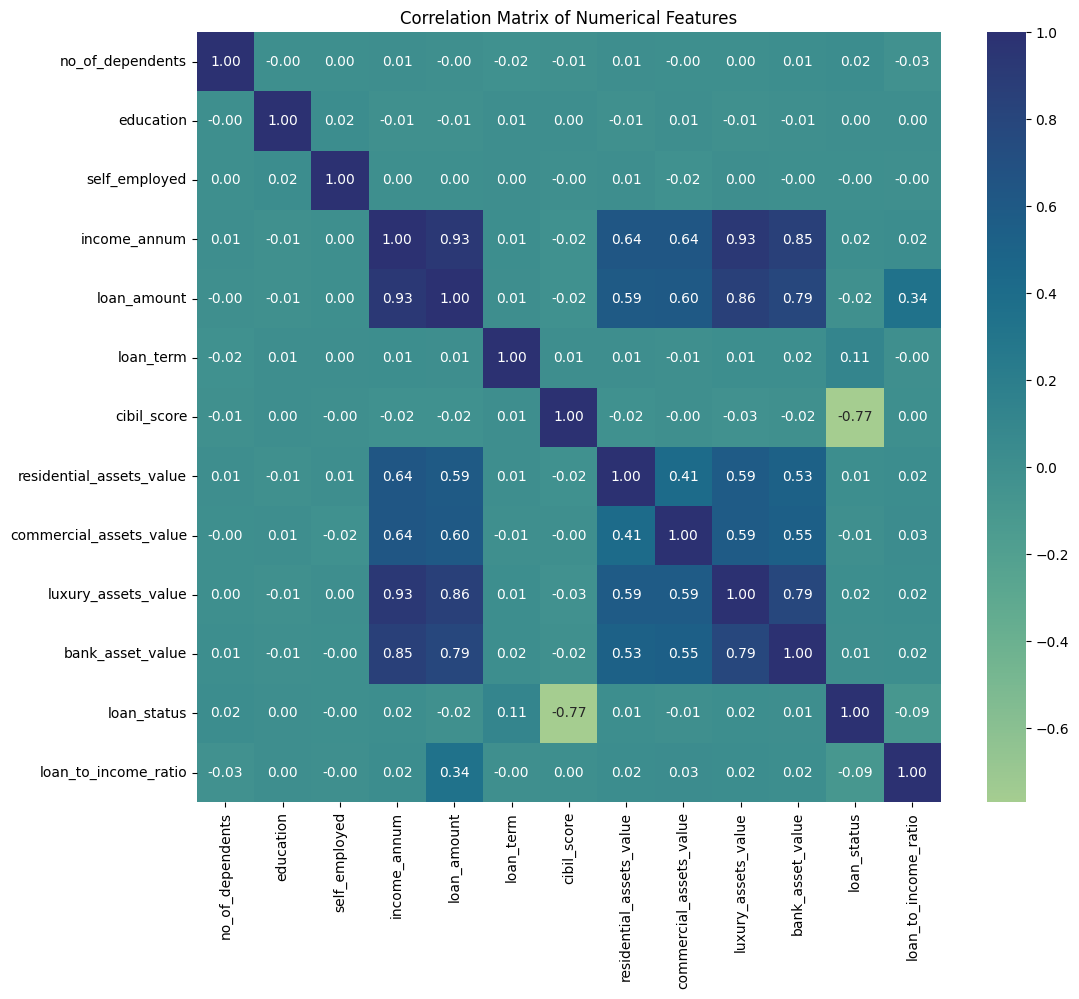

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 0->approved and 1->rejected

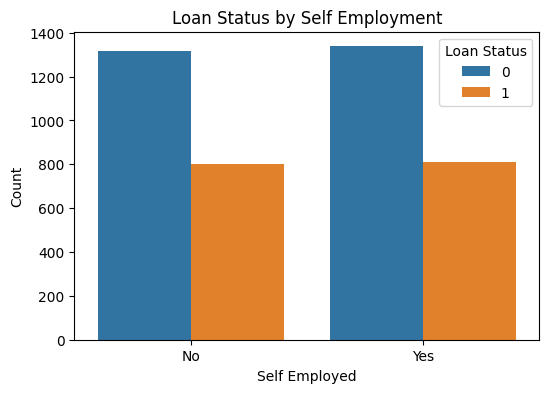

In [ ]:
# Create readable labels
df['self_employed_label'] = df['self_employed'].map({0: 'No', 1: 'Yes'})

# Updated plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='self_employed_label', hue='loan_status')
plt.title('Loan Status by Self Employment')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


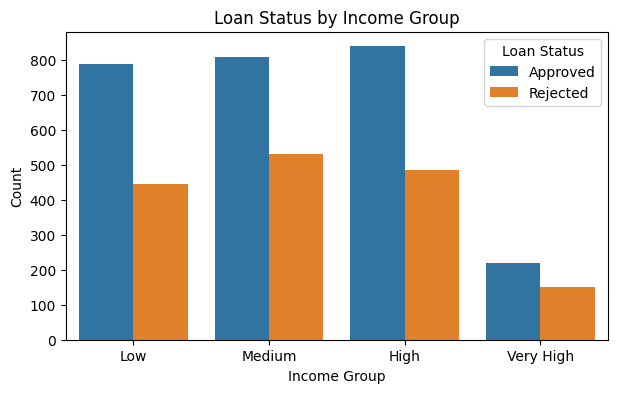

In [ ]:
df['income_group'] = pd.cut(df['income_annum'],
                            bins=[0, 3000000, 6000000, 9000000, float('inf')],
                            labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='income_group', hue='loan_status_label')
plt.title('Loan Status by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


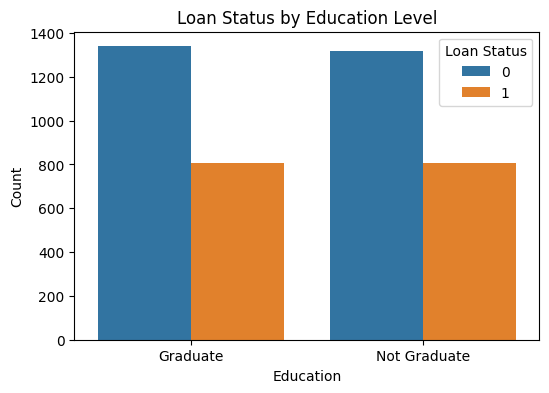

In [ ]:
# Map encoded values to readable labels
df['education_label'] = df['education'].map({0: 'Graduate', 1: 'Not Graduate'})

# Updated plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education_label', hue='loan_status')
plt.title('Loan Status by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


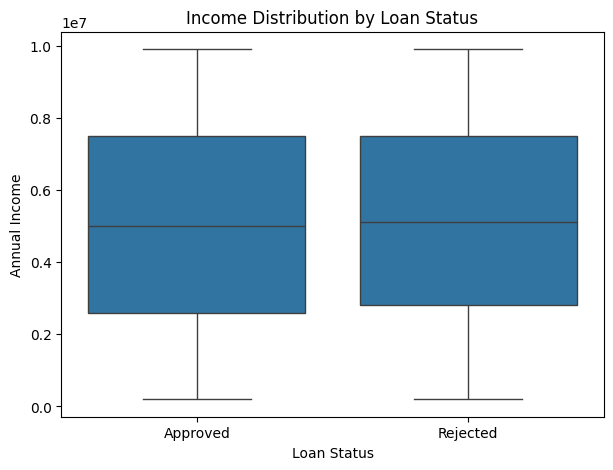

In [ ]:
df['loan_status_label'] = df['loan_status'].map({0: 'Approved', 1: 'Rejected'})

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='loan_status_label', y='income_annum')
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()



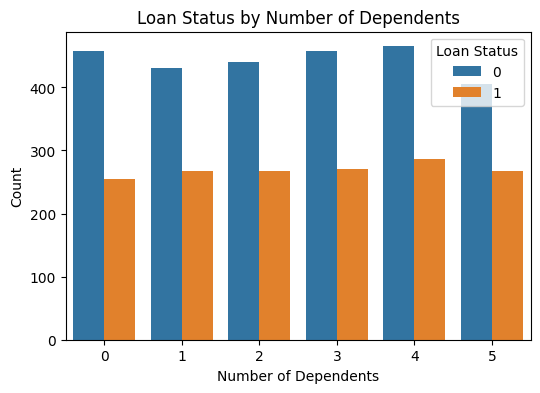

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='no_of_dependents', hue='loan_status')
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


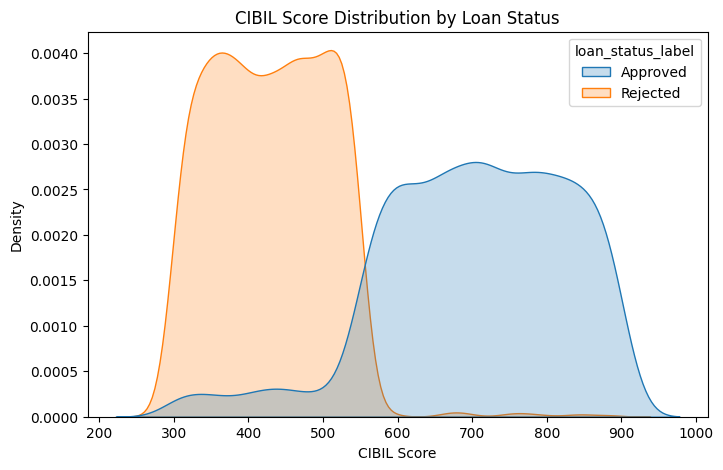

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='cibil_score', hue='loan_status_label', fill=True, common_norm=False)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Density')
plt.show()


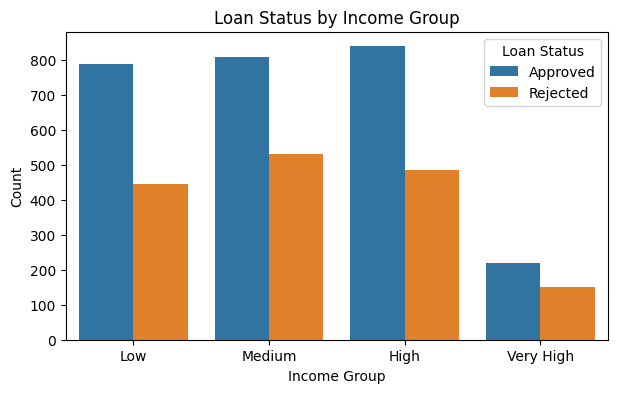

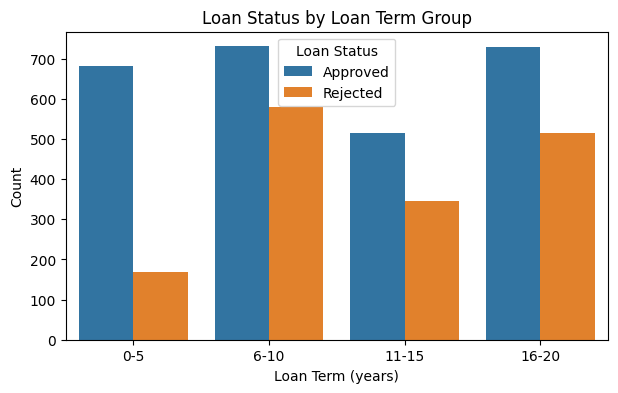

In [ ]:
df['loan_term_group'] = pd.cut(df['loan_term'],
                               bins=[0, 5, 10, 15, 20],
                               labels=['0-5', '6-10', '11-15', '16-20'])

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='loan_term_group', hue='loan_status_label')
plt.title('Loan Status by Loan Term Group')
plt.xlabel('Loan Term (years)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


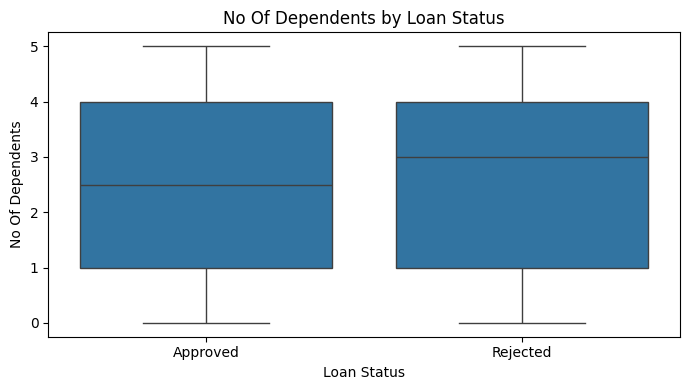

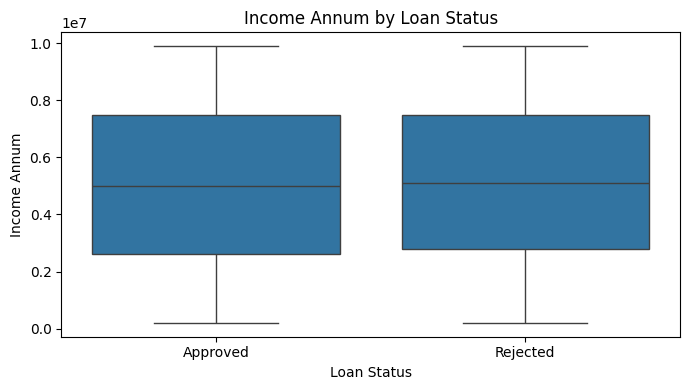

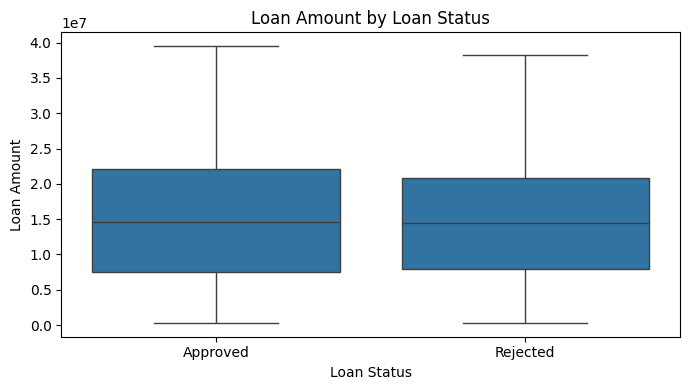

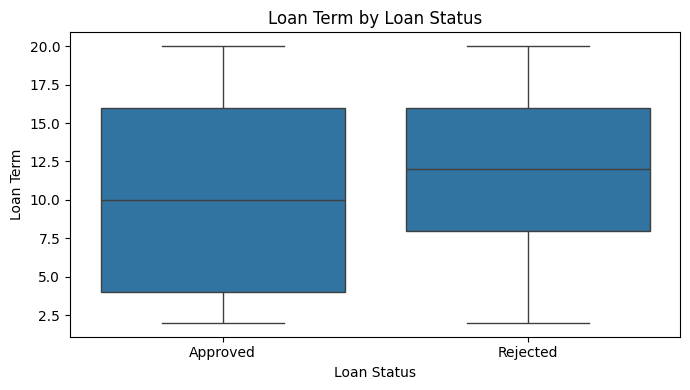

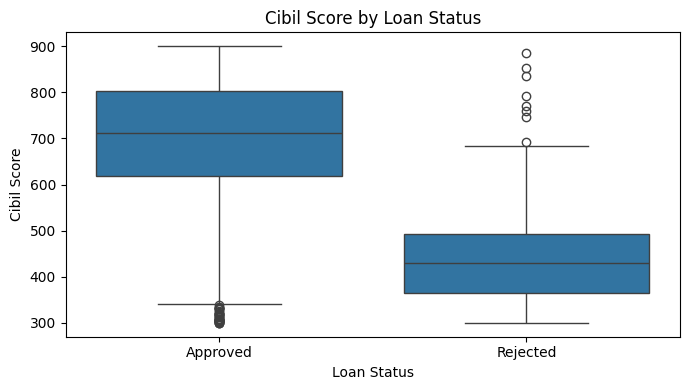

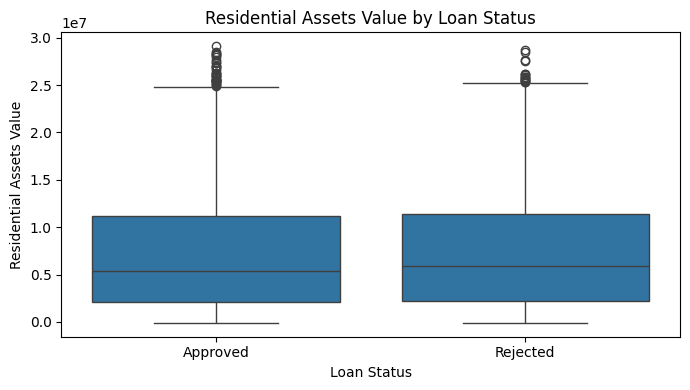

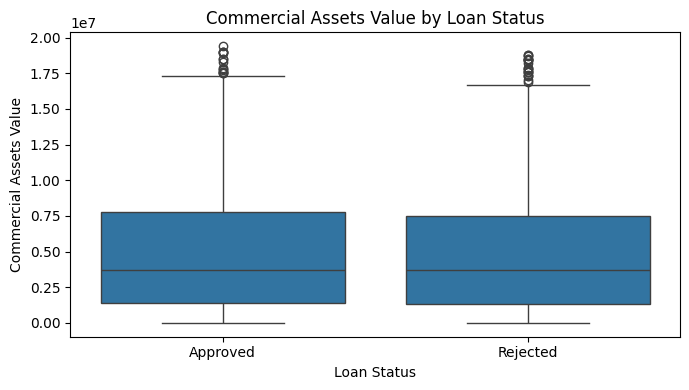

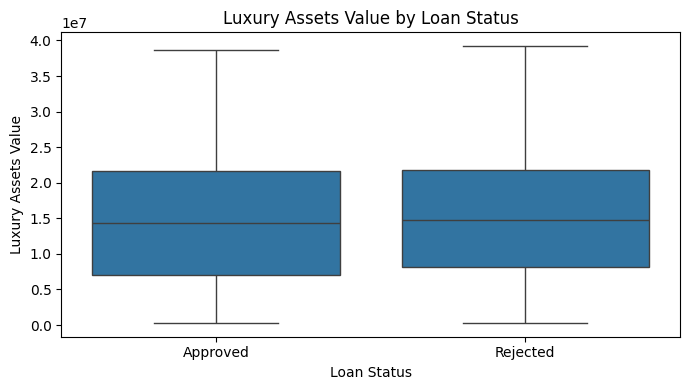

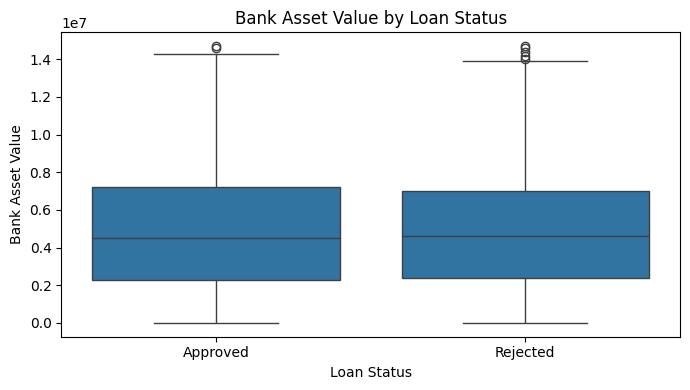

In [ ]:
numerical_cols = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

# If not already mapped, add a readable label
df['loan_status_label'] = df['loan_status'].map({0: 'Approved', 1: 'Rejected'})

# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='loan_status_label', y=col)
    plt.title(f'{col.replace("_", " ").title()} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


MODEL BUILDING

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

# Predict on original test set
y_pred = model.predict(X_test)

# Evaluate the model
print("🔷 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔷 Classification Report:\n", classification_report(y_test, y_pred))
print("🔷 Accuracy Score:", accuracy_score(y_test, y_pred))


🔷 Confusion Matrix:
 [[447  84]
 [ 92 231]]

🔷 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       531
           1       0.73      0.72      0.72       323

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854

🔷 Accuracy Score: 0.7939110070257611


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['AbsCoef'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='AbsCoef', ascending=False, inplace=True)

# Show top features
print(feature_importance[['Feature', 'Coefficient']])


                     Feature   Coefficient
5                  loan_term  2.093075e-01
0           no_of_dependents  3.088889e-02
6                cibil_score -7.327633e-03
2              self_employed  2.865436e-03
1                  education  2.783977e-03
3               income_annum  5.610714e-07
4                loan_amount -7.979502e-08
10          bank_asset_value -2.257250e-08
9        luxury_assets_value -1.412544e-08
8    commercial_assets_value -1.036447e-08
7   residential_assets_value  7.848837e-09


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("🔷 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\n🔷 Classification Report:\n", classification_report(y_test, y_pred_dt))
print("🔷 Accuracy Score:", accuracy_score(y_test, y_pred_dt))


🔷 Confusion Matrix:
 [[522   9]
 [ 10 313]]

🔷 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

🔷 Accuracy Score: 0.977751756440281


In [ ]:
# Pruned tree to reduce overfitting
pruned_dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)
pruned_dt.fit(X_train_res, y_train_res)
y_pred_pruned = pruned_dt.predict(X_test)

# Evaluate
print("🔷 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pruned))
print("\n🔷 Classification Report:\n", classification_report(y_test, y_pred_pruned))
print("🔷 Accuracy Score:", accuracy_score(y_test, y_pred_pruned))


🔷 Confusion Matrix:
 [[524   7]
 [ 13 310]]

🔷 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

🔷 Accuracy Score: 0.9765807962529274


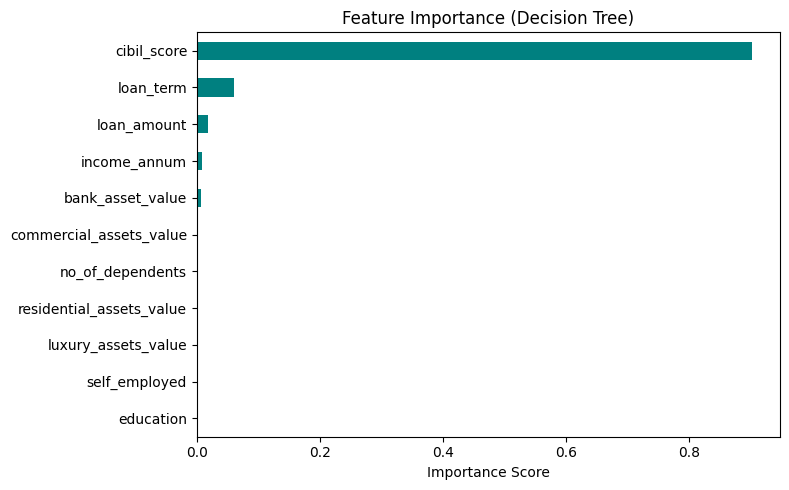

In [ ]:

# Get feature importances
feat_imp = pd.Series(pruned_dt.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', color='teal')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the model
rf_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🔷 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n🔷 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🔷 Accuracy Score:", accuracy_score(y_test, y_pred_rf))


🔷 Confusion Matrix:
 [[513  18]
 [ 10 313]]

🔷 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.95      0.97      0.96       323

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

🔷 Accuracy Score: 0.9672131147540983


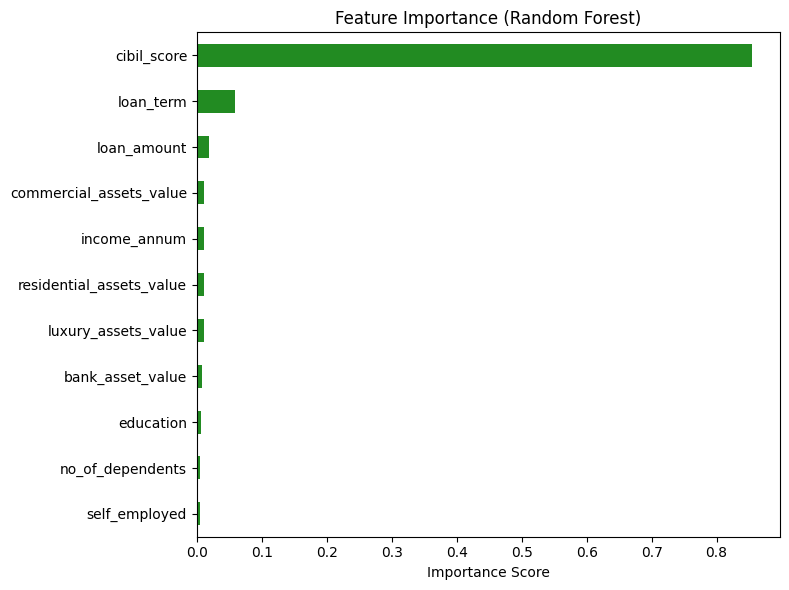

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
rf_feat_imp.plot(kind='barh', color='forestgreen')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


SUPPORT VECTOR MACINES

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training and transform both train and test
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train SVM (linear kernel for simplicity)
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_res_scaled, y_train_res)

# Predict on scaled test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("🔷 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n🔷 Classification Report:\n", classification_report(y_test, y_pred_svm))
print("🔷 Accuracy Score:", accuracy_score(y_test, y_pred_svm))


🔷 Confusion Matrix:
 [[503  28]
 [ 22 301]]

🔷 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       531
           1       0.91      0.93      0.92       323

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854

🔷 Accuracy Score: 0.9414519906323185


CONFUSION MATRIX & ROC CURVE

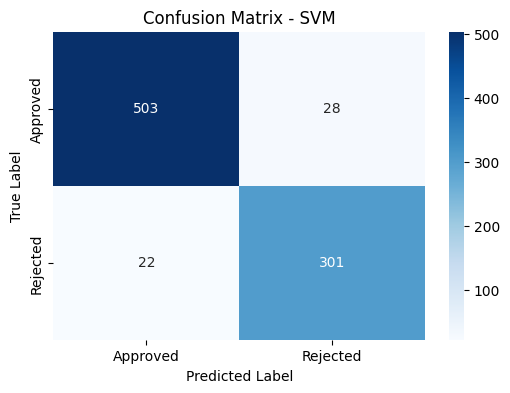

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
labels = ['Approved', 'Rejected']

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


In [ ]:
svm_model = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_model.fit(X_train_res_scaled, y_train_res)
y_pred_svm = svm_model.predict(X_test_scaled)


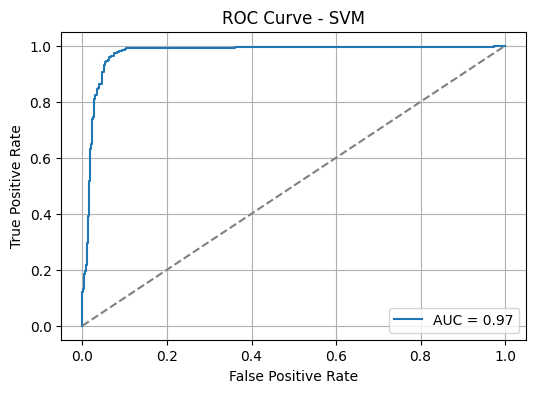

🔷 ROC-AUC Score: 0.9732


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for class 1
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f"🔷 ROC-AUC Score: {auc_score:.4f}")


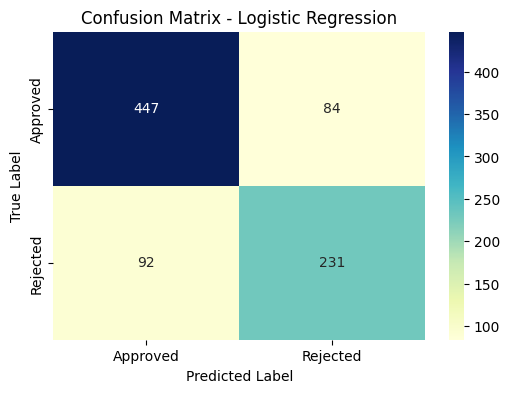

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict labels
y_pred_lr = model.predict(X_test)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
labels = ['Approved', 'Rejected']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


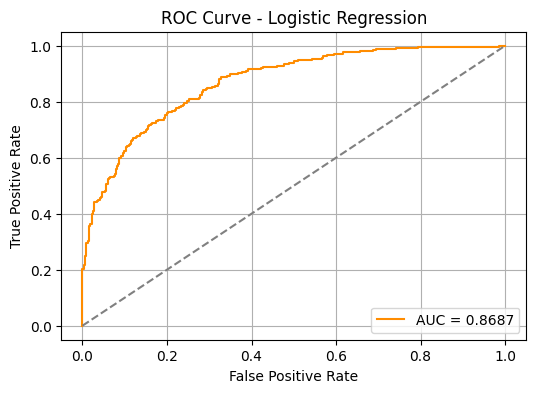

🔷 ROC-AUC Score (Logistic Regression): 0.8687


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for class 1 (rejected)
y_proba_lr = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {auc_lr:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f"🔷 ROC-AUC Score (Logistic Regression): {auc_lr:.4f}")


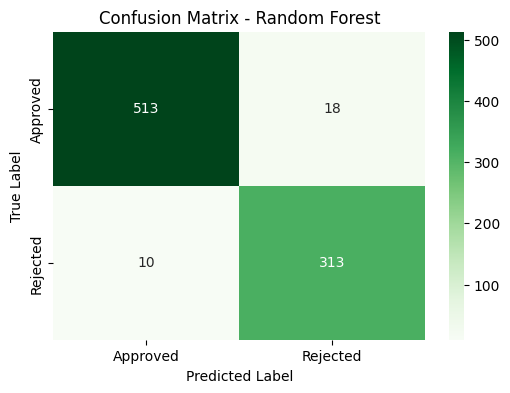

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = ['Approved', 'Rejected']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


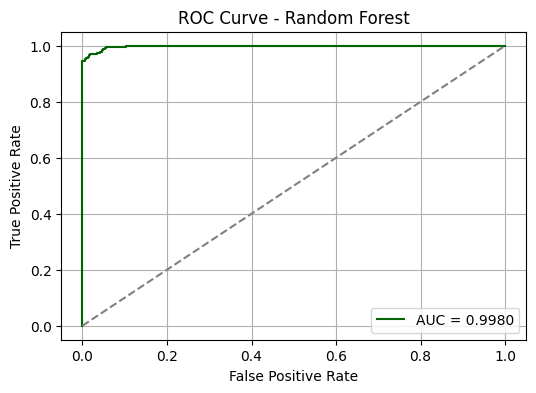

🔷 ROC-AUC Score (Random Forest): 0.9980


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for class 1
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.4f}', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f"🔷 ROC-AUC Score (Random Forest): {auc_rf:.4f}")


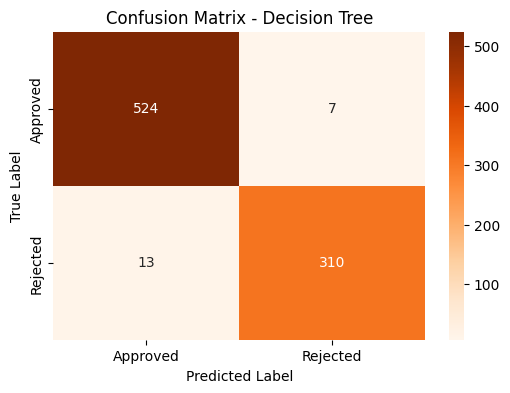

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels
y_pred_dt = pruned_dt.predict(X_test)

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
labels = ['Approved', 'Rejected']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


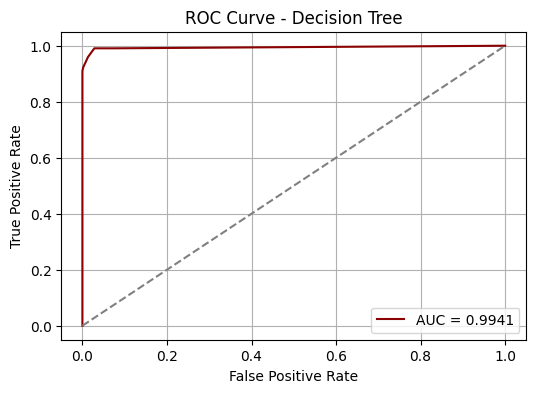

🔷 ROC-AUC Score (Decision Tree): 0.9941


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for class 1
y_proba_dt = pruned_dt.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {auc_dt:.4f}', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC
print(f"🔷 ROC-AUC Score (Decision Tree): {auc_dt:.4f}")


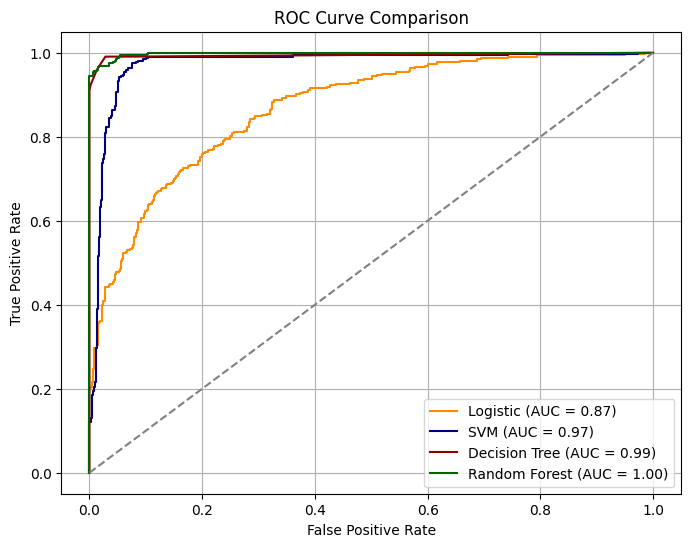

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic (AUC = {auc_lr:.2f})', color='darkorange')
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_score:.2f})', color='navy')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='darkred')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='darkgreen')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# 🔍 Interpretation:
# Decision Tree is highly accurate and very close to Random Forest in AUC — if interpretability is important, this might be a better pick.

# Random Forest still edges out slightly in terms of overall robustness and AUC stability.



##  **1. Best Performing Model: Random Forest**



| Model               | Accuracy | ROC-AUC      | Strengths                                    |
| ------------------- | -------- | ------------ | -------------------------------------------- |
| Logistic Regression | 79.4%    | 0.8687       | Simple, explainable baseline                 |
| SVM                 | 94.1%    | 0.9732       | Balanced, good generalization                |
| Decision Tree       | 97.7%    | 0.9941       | Fast, interpretable, strong                  |
| **Random Forest**   | 96.7%    |  **0.9980** | Best overall, robust, handles complex data  |

###  **Why Random Forest Wins**:

* ✔️ **Highest ROC-AUC** → excellent at distinguishing between approved and rejected cases.
* ✔️ **Low overfitting risk** → due to averaging multiple decision trees.
* ✔️ **Handles nonlinear relationships** between features and outcomes.
* ✔️ **Robust to outliers** and unbalanced feature importance.

 **Verdict**: **Random Forest is the best performing model for this.**
It strikes the right balance between **accuracy, generalization, and robustness**.



##  **2. How a Bank Would Use This Model in Real Life**

A bank could integrate this model into its **loan approval pipeline** in the following ways:



### 🔹 **A. Automated Risk Assessment System**

> When a customer applies for a loan (home, personal, business), the model predicts:

* **1** = Likely to **default / high risk** → rejection
* **0** = Likely to **repay / low risk** → approval

The model uses:

* Income
* Loan amount
* CIBIL score
* Assets
* Employment status
* Education
* Dependents

To output a **decision recommendation**.



### 🔹 **B. Human-in-the-loop System**

* Loan officers can use the model's prediction as **decision support**, not automation.
* Combine **model output** + **manual review** for borderline cases.
* Display **feature importances** for explainability (why a loan was denied/approved).



### 🔹 **C. Benefits to the Bank**

| Benefit                     | Description                                         |
| --------------------------- | --------------------------------------------------- |
|  Faster decisions          | Automates initial screening in seconds              |
| Lower default rates       | Flags risky applicants early                        |
|  Better customer targeting | Helps pre-approve low-risk customers for offers     |
|  Consistency               | Reduces human bias and inconsistency in decisions   |
|  Scalable                  | Can be deployed across branches or online platforms |



